In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64
from IPython.display import display, HTML

В файле Cellphonedata.xlsx содержатся данные о численности населения и количестве мобильных телефонов для 20 стран с наибольшим количеством мобильных телефонов. На основе этих данных выполните задания 1—5.
1. Создайте гистограмму, суммирующую количество телефонов по странам.
2. Создайте точечную диаграмму, отображающую соотношение количества телефонов к численности населения.
3. Настройте срез для фильтрации гистограммы с группировкой для количества мобильных телефонов по странам.
4. Создайте правило фрагментирования для фильтрации гистограммы, суммирующей количество телефонов по странам.
5. Отобразите данные о численности населения на карте.

In [3]:
cellphones = pd.read_excel('~/Study/excel/Ch46/Practice Files/Cellphonedata.xlsx')

In [4]:
cellphones.head()

,Rank,Country,Number of mobile phones,Population
0,1,China,1150000000,1349585838
1,2,India,867800000,1220800359
2,3,United States,327577529,310866000
3,4,Brazil,265741000,192379287
4,5,Russia,256117000,142905200


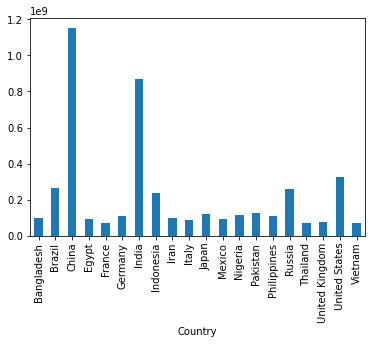

In [20]:
cellphones.groupby('Country')['Number of mobile phones'].sum().plot(kind='bar');

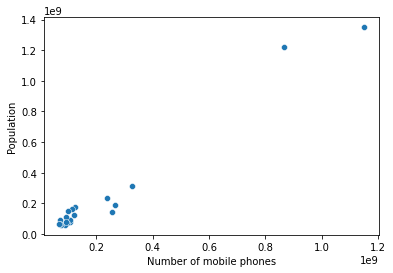

In [25]:
sns.scatterplot(data=cellphones, x='Number of mobile phones', y='Population');

***
На основе данных о филиалах банка создайте спарклайны-графики с одним и тем же масштабом для каждого филиала.

In [73]:
sparklines = pd.read_excel('~/Study/excel/Ch47/Practice Files/sparklines.xlsx',
                          usecols=range(2,9), skiprows=6).rename(columns={'Unnamed: 2': 'City'})

/Users/popov/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


In [158]:
def sparkline(data, figsize=(2, 0.25), **kwags):

    data = np.array(data)
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwags)
    ax.plot(data)
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])    
    
    plt.plot(data.argmin(), data.min(), 'r.')
    plt.plot(len(data) - 1, data[len(data) - 1], 'r.')

    ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.1)
    
    img = BytesIO()
    plt.savefig(img)
    img.seek(0)
    plt.close()
    return '<img src="data:image/png;base64,{}"/>'.format(base64.b64encode(img.read()).decode())

In [159]:
sparklines['Summary'] = sparklines.loc[:, 'Monday': 'Friday'].apply(sparkline, axis=1)

In [160]:
HTML(sparklines.to_html(escape=False))

,City,Monday,Tuesday,Wednesday,Thursday,Friday,Summary
0,New York,1176,768,808,864,1235,
1,Rochester,475,323,333,356,515,
2,Utica,360,250,228,275,378,
3,Syracuse,594,412,408,459,618,
4,Buffalo,698,475,504,551,803,
5,Ossining,306,208,204,234,322,
6,Ithaca,437,288,294,299,450,


***
Зафиксируйте взлеты и падения рынка с помощью спарклайнов выигрыша/проигрыша. Как и в предыдущем случае, данные находятся в файле Dow.xlsx.

In [115]:
dow = pd.read_excel('~/Study/excel/Ch47/Practice Files/Dow.xlsx')

In [116]:
dow.head()

,Date,Adj Close
0,2010-01-04,10583.96
1,2010-01-05,10572.02
2,2010-01-06,10573.68
3,2010-01-07,10606.86
4,2010-01-08,10618.19


In [171]:
HTML(dow.assign(Change=dow['Adj Close'].pct_change())
 .style
 .format({'Date': '{:%Y %m}'})
 .bar(subset=['Change'],
      align='mid',
      color=['red', 'green'],
     )
 .set_properties(**{'text-align': 'center'}, subset='Change')
 .render()
)

,Date,Adj Close,Change
0,2010 01,10583.960000,nan
1,2010 01,10572.020000,-0.001128
2,2010 01,10573.680000,0.000157
3,2010 01,10606.860000,0.003138
4,2010 01,10618.190000,0.001068
5,2010 01,10663.990000,0.004313
6,2010 01,10627.260000,-0.003444
7,2010 01,10680.770000,0.005035
8,2010 01,10710.550000,0.002788
9,2010 01,10609.650000,-0.009421


***
В файле Goals.xlsx для каждого месяца содержатся процентные отношения, касающиеся достижения целей филиалами банка. Обработайте эти данные с помощью спарклайнов выигрыша/проигрыша.

In [137]:
goals = pd.read_excel('~/Study/excel/Ch47/Practice Files/Goals.xlsx',
                          usecols=range(3,16), skiprows=6)

In [138]:
goals

,Branch,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,New York,-0.11,-0.03,-0.12,0.32,0.33,0.57,0.03,0.07,0.47,0.01,0.11,0.70
1,Rochester,-0.27,-0.39,-0.37,-0.42,-0.38,-0.34,0.08,0.12,0.17,0.31,0.19,0.29
2,Utica,-0.37,-0.26,-0.37,-0.57,-0.30,-0.55,-0.24,-0.42,-0.30,-0.39,-0.21,-0.28
3,Syracuse,0.43,0.37,0.14,0.12,0.28,0.33,0.37,0.31,0.26,0.13,0.10,0.48


In [168]:
def bar_sparkline(data, figsize=(2, 0.25), **kwags):

    data = np.array(data)
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwags)
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])    
    colors = np.where(data < 0, 'red', 'blue')
    plt.bar(range(len(data)), data, width=1, color=colors)
    
    img = BytesIO()
    plt.savefig(img)
    img.seek(0)
    plt.close()
    return '<img src="data:image/png;base64,{}"/>'.format(base64.b64encode(img.read()).decode())

In [169]:
HTML(goals.assign(Summary=goals.loc[:, 'Jan': 'Dec']
                  .apply(bar_sparkline, axis=1))
                  .to_html(escape=False))

,Branch,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Summary
0,New York,-0.11,-0.03,-0.12,0.32,0.33,0.57,0.03,0.07,0.47,0.01,0.11,0.70,
1,Rochester,-0.27,-0.39,-0.37,-0.42,-0.38,-0.34,0.08,0.12,0.17,0.31,0.19,0.29,
2,Utica,-0.37,-0.26,-0.37,-0.57,-0.30,-0.55,-0.24,-0.42,-0.30,-0.39,-0.21,-0.28,
3,Syracuse,0.43,0.37,0.14,0.12,0.28,0.33,0.37,0.31,0.26,0.13,0.10,0.48,


Эти задания относятся к данным в файлах Jancon.xlsx и Febcon.xlsx. Каждый файл содержит проданный продукт, показатели продаж в штуках и выручку в долларах для сделок за месяц.
1. Создайте объединенный лист, на котором определен общий показатель продаж в штуках и общая выручка в долларах для каждого продукта по регионам.
2. Создайте объединенный лист, на котором за первый квартал по регионам для каждого продукта определяется самая крупная сделка с точки зрения выручки и количества проданных единиц продукции.

In [175]:
jancon = pd.read_excel('~/Study/excel/Ch50/Practice Files/Jancon.xlsx',
                          usecols=range(1,7), skiprows=5)
febcon = pd.read_excel('~/Study/excel/Ch50/Practice Files/Febcon.xlsx',
                          usecols=range(1,7), skiprows=5)

In [174]:
jancon.head()

,Product,East revenue,East units sold,West revenue,West units sold
0,A,188,47,136,34
1,B,40,10,22,11
2,C,184,46,66,33
3,B,45,15,156,39
4,B,36,18,138,46


In [176]:
febcon.head()

,Product,East revenue,East units sold,West revenue,West units sold
0,B,295,59,295,59
1,C,305,61,305,61
2,A,164,41,164,41
3,B,285,57,285,57
4,B,220,55,220,55


In [179]:
pd.concat([jancon, febcon]).groupby('Product')[['East revenue', 'East units sold']].sum()

,East revenue,East units sold
Product,,
A,1071,305
B,1429,366
C,1346,349


In [180]:
pd.concat([jancon, febcon]).groupby('Product').max()

,East revenue,East units sold,West revenue,West units sold
Product,,,,
A,220,59,220,59
B,295,59,295,59
C,305,61,305,61


В файле Cakes.xlsx содержится количество продавцов и выручка пекарни за каждый месяц. На основе этих данных выполните задания 1—2.
1. Создайте комбинированную диаграмму со вспомогательной осью для количества продавцов и выручки за каждый месяц.
2. Постройте диаграмму ежемесячной выручки и вставьте в диаграмму подписи данных.

In [186]:
cakes = pd.read_excel('~/Study/excel/Ch52/Practice Files/Cakes.xlsx',
                          usecols=range(2,5), skiprows=4)

In [187]:
cakes

,Month,Salespeople,Revenue
0,January,25,2735900
1,february,21,2210271
2,March,28,3004596
3,April,22,2825548
4,May,28,3576132
5,June,25,3128575
6,July,34,3874198
7,August,24,2665368
8,September,28,2833012
9,October,23,2424844


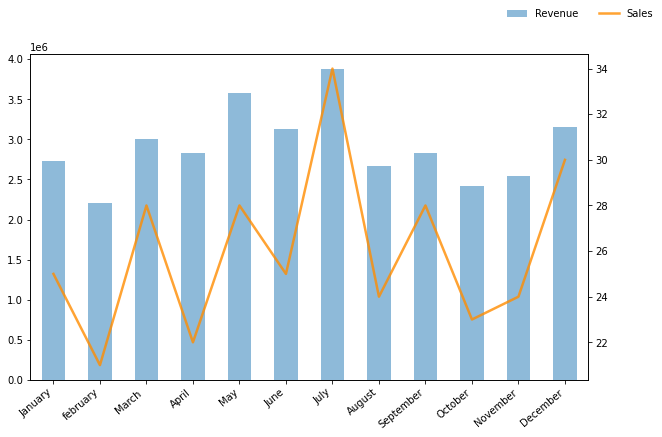

In [270]:
_, ax = plt.subplots(figsize=(10,6))

cakes['Revenue'].plot(kind='bar', ax=ax, alpha=.5)
cakes['Salespeople'].plot(ax=ax, secondary_y=True, color='darkorange', linewidth=2.5, label='Sales', alpha=.8)

ax.set_xticklabels(cakes.Month, rotation=40, ha='right')

plt.figlegend(ncol=2, frameon=False)
plt.show()

In [277]:
sns.barplot?

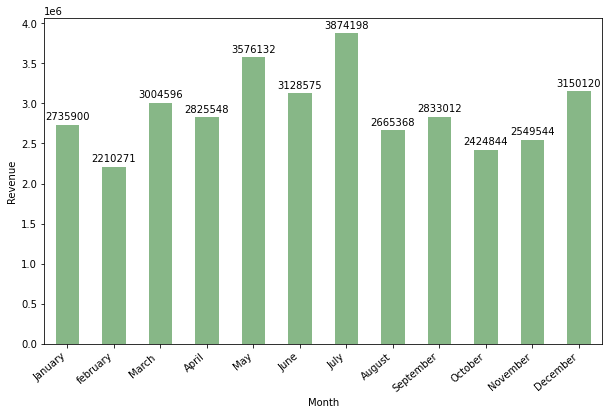

In [284]:
_, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x='Month', y='Revenue', data=cakes, color='g', alpha=.5)
  
# annotate
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')
# set bar width
width = 0.5    
for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - width
        
    patch.set_width(width)
    patch.set_x(patch.get_x() + diff * .5)

ax.set_xticklabels(cakes.Month, rotation=40, ha='right')
plt.show()

В табице содержатся отчеты о работе пяти сотрудников. Представьте эти данные на лепестковой диаграмме.

| Сотрудник | Трудолюбие | Работа в команде | Выполнение заданий в срок | Пунктуальность |
| --- | --- | --- | --- | --- |
| Уэйн | 1 | 2 | 3 | 4 |
| Вивиан | 5 | 6 | 7 | 8 |
| Грег | 10 | 9.5 | 9 | 8.5 |
| Джен | 9 | 2 | 9 | 4 |
| Ванда | 1 | 1.5 | 2 | 2.5 |

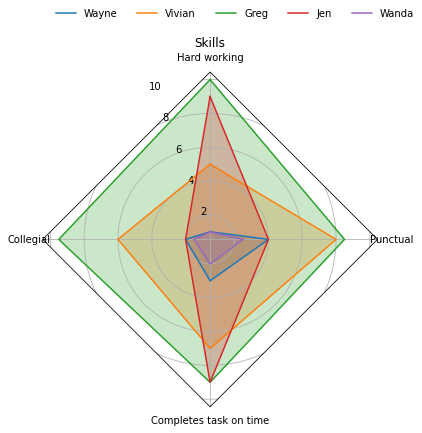

In [316]:
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

data = [['Hard working', 'Collegial', 'Completes task on time', 'Punctual'],
        ('Skills', [
            [1, 2, 3, 4],
            [5, 6, 7, 8],
            [10, 9.5, 9, 8.5],
            [9, 2, 9, 4],
            [1, 1.5, 2, 2.5]]),
        ['Wayne', 'Vivian', 'Greg', 'Jen', 'Wanda']
       ]

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([2, 4, 6, 8, 10])
ax.set_title(title, position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d, alpha=0.25)
ax.set_varlabels(spoke_labels)

plt.figlegend(data[1], ncol=len(data[1]), frameon=False)
plt.show()

Проект состоит из пяти задач. Задано время начала и продолжи- тельность выполнения каждой задачи. Представьте эти данные на диаграмме Ганта.

| Задача | Время начала | Продолжительность |
| --- | --- | --- |
| A | 0 | 4 |
| B | 3	| 6 |
| C | 5	| 7 |
| D | 6 | 8 |
| E | 3	| 6 |

In [328]:
tasks = pd.DataFrame({'Task': ['A', 'B', 'C', 'D', 'E'],
                      'Start' : [0, 3, 5, 6, 3],
                      'Duration': [4, 6, 7, 8, 6],
                      'Resource': ['In', 'Out', 'Out', 'Out', 'In']
                     })

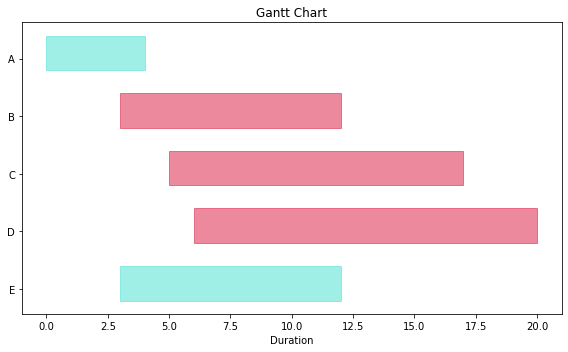

In [349]:
color = {'In': 'turquoise', 'Out': 'crimson'}
fig,ax=plt.subplots(figsize=(8,5))

labels = []
for i, task in enumerate(tasks.assign(Bar = tasks.Start + tasks.Duration).groupby('Task')):
    labels.append(task[0])
    for r in task[1].groupby('Resource'):
        data = r[1][['Start', 'Bar']]
        ax.broken_barh(data.values, (i-0.4,0.6), color=color[r[0]], alpha=.5)

ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels) 
ax.set_xlabel('Duration')
plt.title('Gantt Chart')
plt.gca().invert_yaxis()
plt.tight_layout()       
plt.show()

В таблице приведена прибыль, а также доходы и расходы в разбивке по годам. Представьте эти данные на диаграмме "водопад".


| Статья | Сумма, $ |
| --- | --- |
| Доходы | 300000 |
| Прибыль | 65000 |
| Трудозатраты | 100000	|
| Затраты на материал | 80000 |
| Накладные расходы | 55000	|

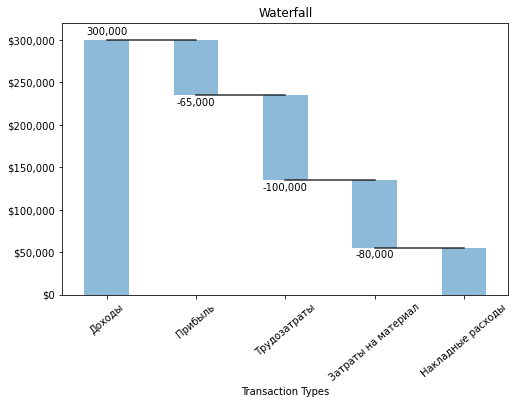

In [350]:
from matplotlib.ticker import FuncFormatter

def money(x, pos):
    'The two args are the value and tick position'
    return "${:,.0f}".format(x)
formatter = FuncFormatter(money)

index = ['Доходы', 'Прибыль', 'Трудозатраты', 'Затраты на материал', 'Накладные расходы']
data = {'amount': [300000, -65000, -100000, -80000, -55000]}

#Store data and create a blank series to use for the waterfall
trans = pd.DataFrame(data=data,index=index)
blank = trans.amount.cumsum().shift(1).fillna(0)

#Get the net total number for the final element in the waterfall
total = trans.sum().amount
#trans.loc["net"]= total
#blank.loc["net"] = total

#The steps graphically show the levels as well as used for label placement
step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan

#When plotting the last element, we want to show the full bar,
#Set the blank to 0

#blank.loc["net"] = 0

#Plot and label
my_plot = trans.plot(kind='bar', stacked=True, bottom=blank, 
                     legend=None, figsize=(8,5), alpha=.5, title="Waterfall")
my_plot.plot(step.index, step.values, 'k', alpha=.8)
my_plot.set_xlabel("Transaction Types")

#Format the axis for dollars
my_plot.yaxis.set_major_formatter(formatter)

#Get the y-axis position for the labels
y_height = trans.amount.cumsum().shift(1).fillna(0)

#Get an offset so labels don't sit right on top of the bar
max = trans.max()
neg_offset = max / 25
pos_offset = max / 50
plot_offset = int(max / 15)

#Start label loop
loop = 0
for index, row in trans.iterrows():
    # For the last item in the list, we don't want to double count
    if row['amount'] == total:
        y = y_height[loop]
    else:
        y = y_height[loop] + row['amount']
    # Determine if we want a neg or pos offset
    if row['amount'] > 0:
        y += pos_offset
    else:
        y -= neg_offset
    my_plot.annotate("{:,.0f}".format(row['amount']),( loop,y),ha="center")
    loop+=1

#Scale up the y axis so there is room for the labels
my_plot.set_ylim(0,blank.max()+int(plot_offset))
#Rotate the labels
my_plot.set_xticklabels(trans.index,rotation=40);